<div style="text-align:center">
    <h1>
        Policy Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called policy iteration. In it, we will iteratively interleave two processes: policy evaluation and policy improvement, until the optimal policy and state values are found.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [2]:
env = Maze()

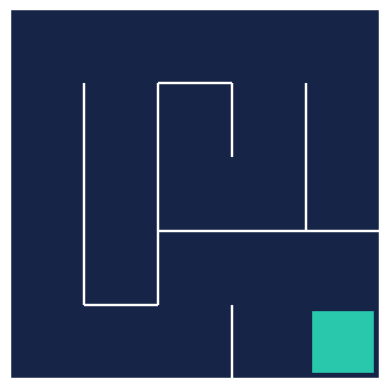

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [19]:
policy_probs = np.full((5, 5, 4), 0.25)

In [20]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [21]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

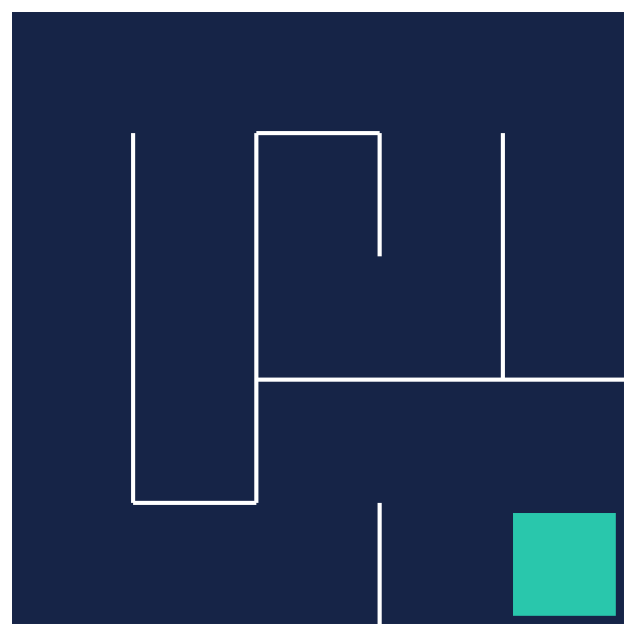

In [22]:
test_agent(env, policy, episodes=1)

#### Plot the policy

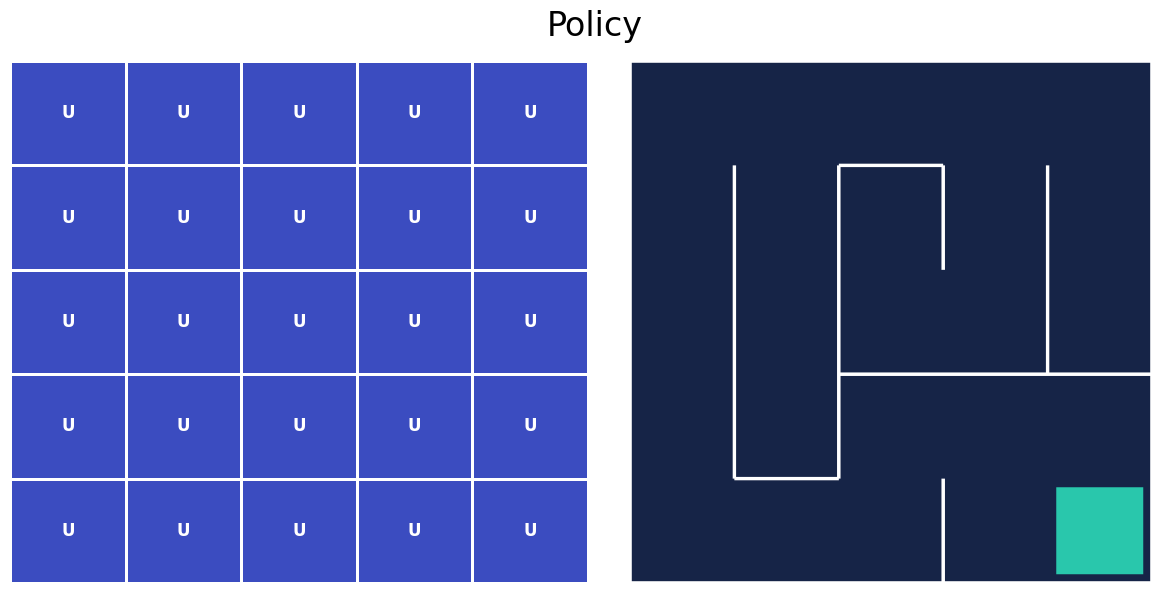

In [23]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [24]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

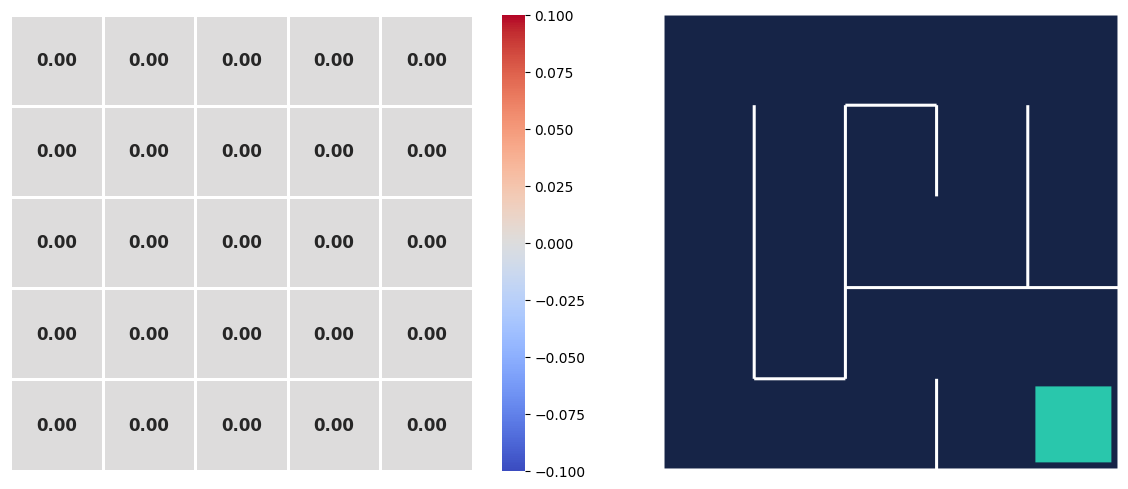

In [25]:
plot_values(state_values, frame)

## Implement the Policy Iteration algorithm

</br>

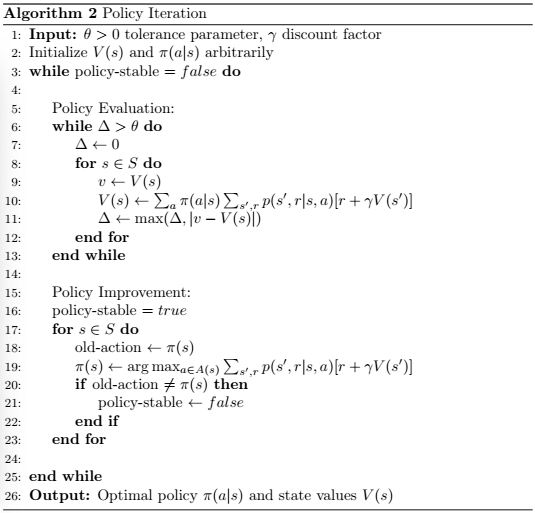

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [26]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=.99):
    delta = float('inf')
    i = 1
    while delta > theta:
        delta = 0
        max_d = 0

        # Policy evaluation
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                new_value = 0.
                action_probs = policy_probs[(row, col)]
                max_qsa = float('-inf')

                # iterate through probabilities for each action
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)

                    new_value += prob * (reward + gamma * state_values[next_state])
                    # where as value iteration will not count the probability for the action
                    # qsa = reward + gamma * state_values[next_state]
                    # if qsa > max_qsa:
                    #     max_qsa = qsa
                    #     action_probs = np.zeros(4)
                    #     action_probs[action] = 1.

                state_values[(row, col)] = new_value

                # You don't need to update policy direction unlike value iteration:
                # policy_probs[(row, col)] = action_probs

                delta = max(delta, abs(new_value - old_value))
                if delta > max_d: max_d = delta
        print(i, max_d)   
        i+=1 

In [27]:
def policy_improvement(policy_probs, state_values, gamma=.99):
    policy_stable = True

    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row, col)].argmax()

            new_action = None
            max_qsa = float('-inf')

            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row, col), action)
                qsa = reward + gamma * state_values[next_state]

                if qsa > max_qsa:
                    max_qsa = qsa
                    new_action = action

            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row, col)] = action_probs

            if new_action != old_action:
                policy_stable = False
    return policy_stable


In [28]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=.99):
    policy_stable = False

    while not policy_stable:
        policy_evaluation(policy_probs, state_values, theta, gamma)
        plot_values(state_values, frame)

        policy_stable = policy_improvement(policy_probs, state_values, gamma)
        plot_policy(policy_probs, frame)

1 1.637354451259668
2 1.4707146726722193
3 1.3819125607986527
4 1.3400173889772375
5 1.306463260988851
6 1.2749579391421584
7 1.2464329191734063
8 1.220743692206792
9 1.1974629704635902
10 1.1803477467291863
11 1.1642977008735258
12 1.148688148895456
13 1.133185549203164
14 1.1178086175711321
15 1.1025750499406897
16 1.0875004097108345
17 1.0725976600245595
18 1.0578770919714273
19 1.0433464782270043
20 1.0290113406834678
21 1.0148752623332093
22 1.001474573954816
23 0.9889606458279587
24 0.9765387160061358
25 0.9642193450513616
26 0.9520105292441308
27 0.9399182772893084
28 0.9279470520007891
29 0.9161001102182063
30 0.9043797655312638
31 0.8927875921121711
32 0.8813245833811365
33 0.869991275867612
34 0.8587878461401317
35 0.8477141868204683
36 0.8367699663030379
37 0.8259546757455993
38 0.8152676660948757
39 0.8047081772968454
40 0.7942753613689746
41 0.78396830064667
42 0.7737860222327129
43 0.7637275094581
44 0.753791710989546
45 0.743977548084203
46 0.734283920385586
47 0.7247097

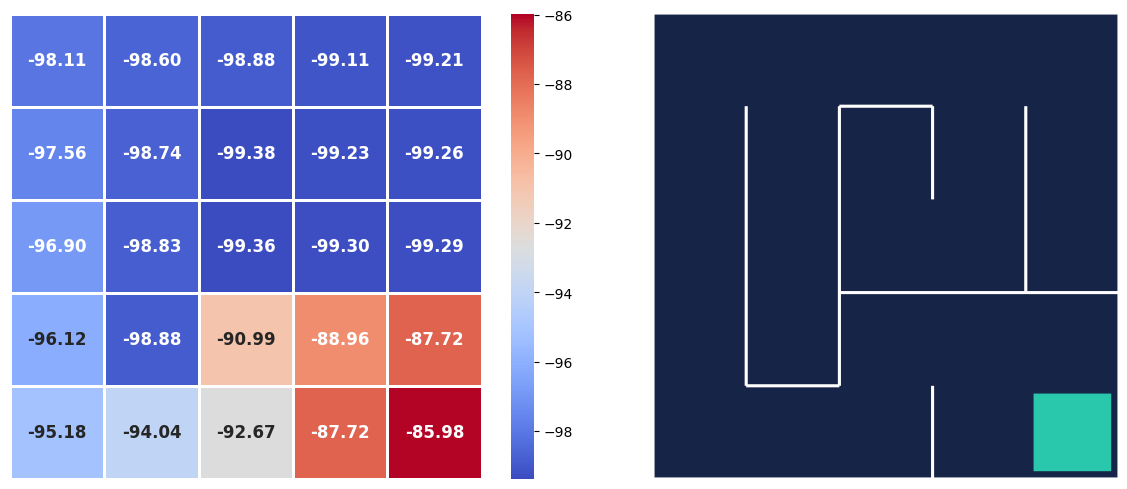

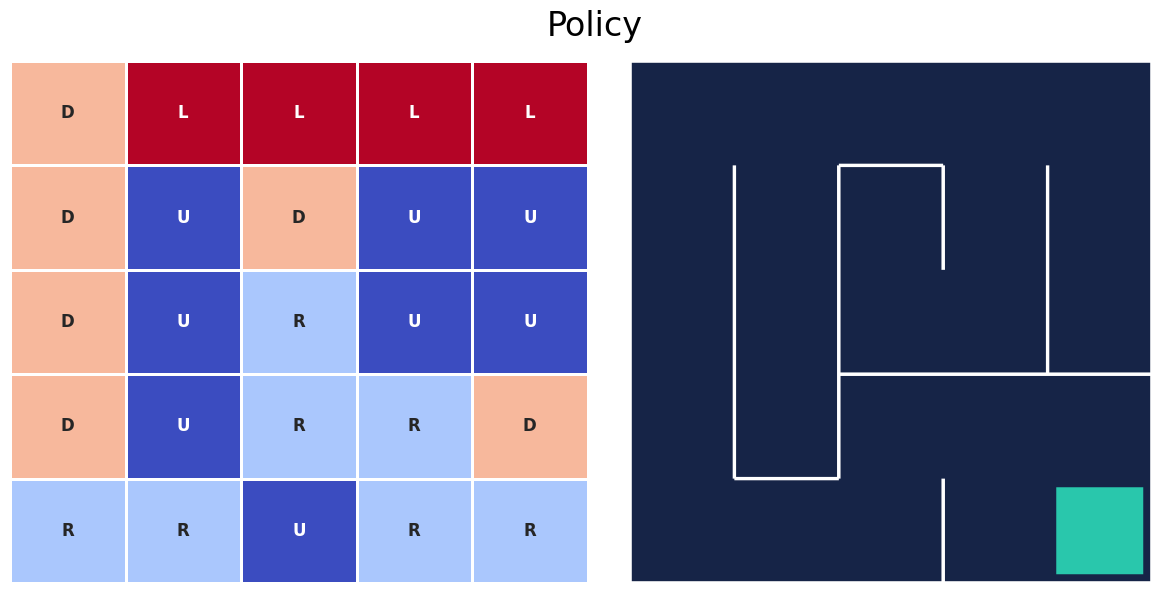

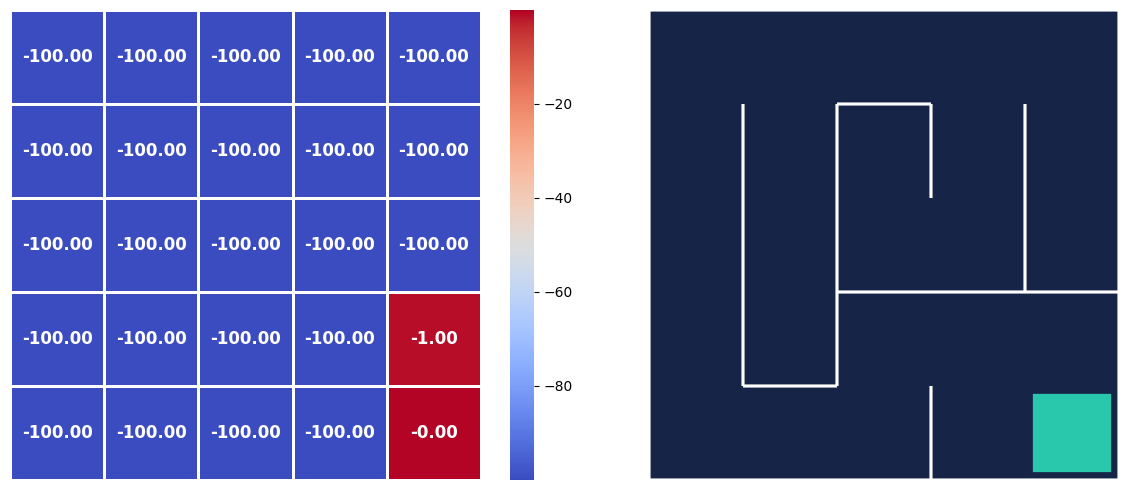

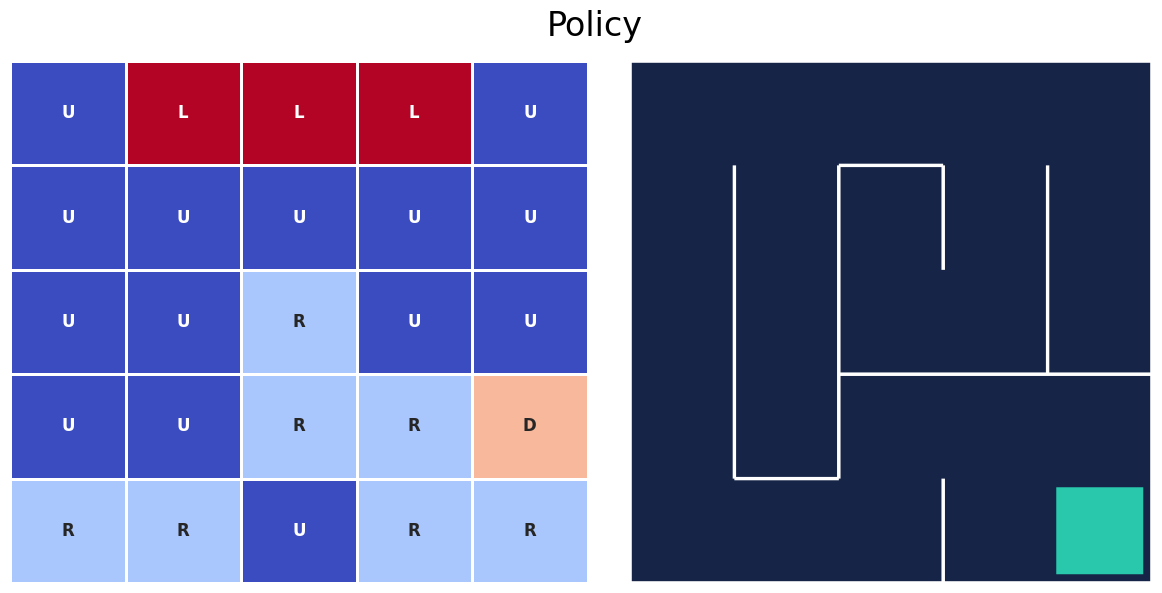

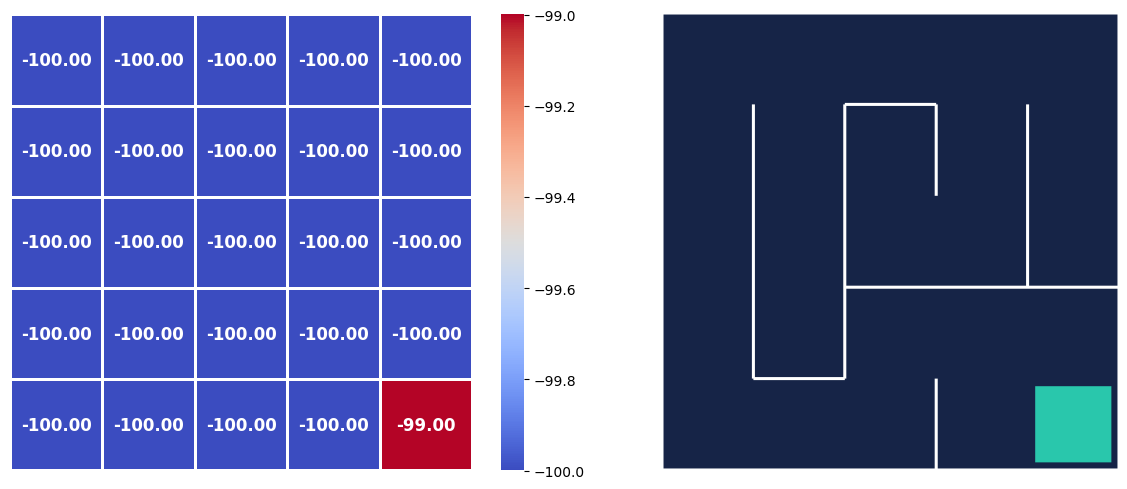

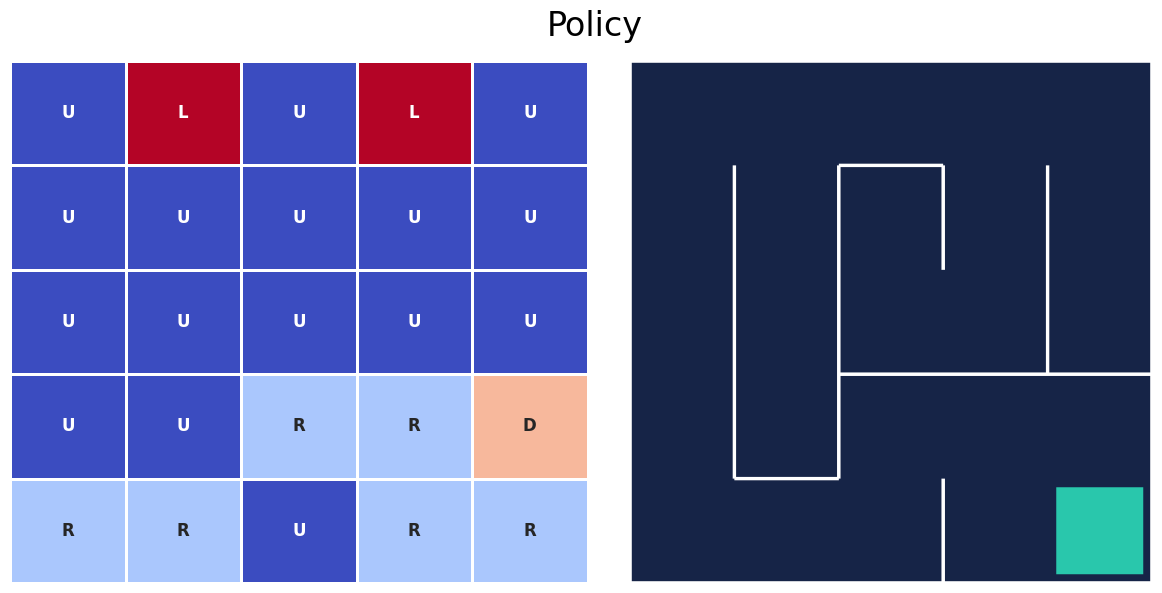

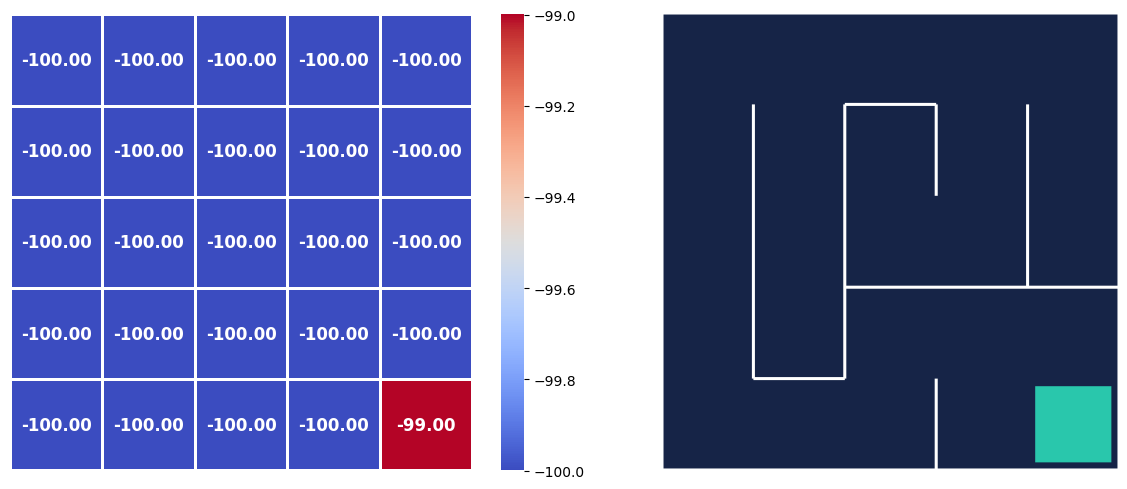

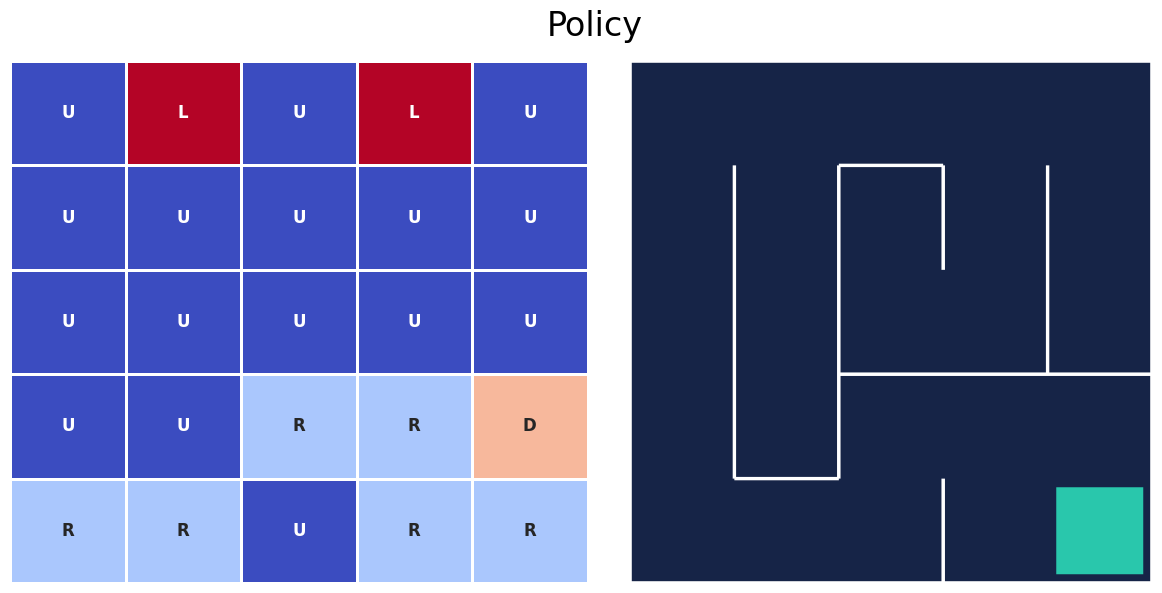

In [29]:
policy_iteration(policy_probs, state_values)

## Show results

#### Test the resulting agent

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)